In [1]:
import numpy as np
import pandas as pd

In [2]:
# visual setup

import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = 8, 6

plt.rcParams["hatch.linewidth"] = 0.3

[Simpson's Paradox Tutorial App](https://share.streamlit.io/elzurdo/causal_inference/main/apps/simpsons_paradox.py)

# Study Q2

> *A baseball batter Tim has a better batting average than his teammate Frank. However, someone notices that Frank has a better batting average than Tim against both right-handed and left-handed pitchers. How can this happen? (Present your answer in a table.)*


This can happend when when we have a situation where we have an imbalance between the 
batting averages as well as an imbalance between pitcher types.  

Assuming the total number of pitches from left handers $N^L$ plus those from right handers $N^R$ are the same 
for both Frank and Tim and batting averages $B$ of Frank is better than Tim:  

$B^R_\text{Frank} > B^R_\text{Tim} >> B^L_\text{Frank} > B^L_\text{Tim}$,   
$N^R_\text{Frank} < N^R_\text{Tim} \text{ assuming same total } \rightarrow N^L_\text{Frank} > N^L_\text{Tim}$


In [3]:
# Example setup: batting average - frank batts better than tim. Right: 0.9 > 0.8, Left: 0.2 > 0.1
frank_batt_ave_right  = 1.
frank_batt_ave_left = 0.2

tim_batt_ave_right  = 0.8
tim_batt_ave_left = 0.1

In [4]:
# Exaple setup: number of batts - 
total_batts = 100

frank_batt_right = 10
frank_batt_left = total_batts - frank_batt_right

tim_batt_right = 90
tim_batt_left = total_batts - tim_batt_right

In [5]:
frank_succeed_right = frank_batt_right * frank_batt_ave_right
frank_fail_right = frank_batt_right * (1 - frank_batt_ave_right)

df_batting = \
pd.DataFrame(
{0: {"player": "frank", "pitcher": "right", "successes": frank_batt_right * frank_batt_ave_right, "failures" : frank_batt_right * (1 - frank_batt_ave_right)},
 1: {"player": "frank", "pitcher": "left", "successes": frank_batt_left * frank_batt_ave_left, "failures" : frank_batt_left * (1 - frank_batt_ave_left)},
 2: {"player": "tim", "pitcher": "right", "successes": tim_batt_right * tim_batt_ave_right, "failures" : tim_batt_right * (1 - tim_batt_ave_right)},
 3: {"player": "tim", "pitcher": "left", "successes": tim_batt_left * tim_batt_ave_left, "failures" : tim_batt_left * (1 - tim_batt_ave_left)},  
}
).T

df_batting

,player,pitcher,successes,failures
0,frank,right,10.0,0.0
1,frank,left,18.0,72.0
2,tim,right,72.0,18.0
3,tim,left,1.0,9.0


In [6]:
frank = df_batting.query("player == 'frank'").sum()
tim = df_batting.query("player == 'tim'").sum()

print(f"Frank: {100* frank['successes']/ frank[['successes', 'failures']].sum():0.0f}% - succeeds {frank['successes']:0.0f} times and fails {frank['failures']:0.0f}")
print(f"Tim  : {100* tim['successes']/ tim[['successes', 'failures']].sum():0.0f}% - succeeds {tim['successes']:0.0f} times and fails {tim['failures']:0.0f}")

Frank: 28% - succeeds 28 times and fails 72
Tim  : 73% - succeeds 73 times and fails 27


**Graph model considerations**   

Outcome - batting avarage  
Batter - Tim or Frank  
Pitcher - Left handed or Right handed  

Pitcher selection does not depend on the Batter.   
Batter selection does not depend on the Pitcher.  
The outcome is a function of both the Pitcher and the Batter.   

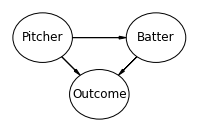

In [7]:
import daft  # pip install daft    From: https://pypi.org/project/data/

pgm = daft.PGM(aspect=1.2, node_unit=1.75)
pgm.add_node("batter", r"Batter", 4, 3)
pgm.add_node("pitcher", r"Pitcher", 2, 3)
pgm.add_node("outcome", r"Outcome", 3, 2)
pgm.add_edge("pitcher", "outcome")
pgm.add_edge("batter", "outcome")
pgm.add_edge("pitcher", "batter") # the batter depends on the pitcher
pgm.render()
pass

Todo: 

* Widget this!


# Study Q3

Study question 1.2.3

> *Determine, for each of the following causal stories, whether you should use the aggregate or the segregated data to determine the true effect.*

> *(a) There are two treatments used on kidney stones: Treatment A and Treatment B. Doctors are more likely to use Treatment A on large (and therefore, more severe) stones and more likely to use Treatment B on small stones. Should a patient who doesn’t know the size of his or her stone examine the general population data, or the stone size-specific data when determining which treatment will be more effective?*


They should most definitely look at the more granular data.  

We have graph:  
Recovery <--- Stone --> Treatment --> Recovery   

Assuming a 50% chance between large and small they should choose the 

This assumes failure  

severity ...

> *(b) There are two doctors in a small town. Each has performed 100 surgeries in his career, which are of two types: one very difficult surgery and one very easy surgery. The first doctor performs the easy surgery much more often than the difficult surgery and the second doctor performs the difficult surgery more often than the easy surgery. You need surgery, but you do not know whether your case is easy or difficult. Should you consult the success rate of each doctor over all cases, or should you consult their success rates for the easy and difficult cases separately, to maximize the chance of a successful surgery?*

# Study Q4

Study question 1.2.4  

> *In an attempt to estimate the effectiveness of a new drug, a randomized experiment is con- ducted. In all, 50% of the patients are assigned to receive the new drug and 50% to receive a placebo. A day before the actual experiment, a nurse hands out lollipops to some patients who show signs of depression, mostly among those who have been assigned to treatment the next day (i.e., the nurse’s round happened to take her through the treatment-bound ward). Strangely, the experimental data revealed a Simpson’s reversal: Although the drug proved beneficial to the population as a whole, drug takers were less likely to recover than nontakers, among both lollipop receivers and lollipop nonreceivers. Assuming that lollipop sucking in itself has no effect whatsoever on recovery, answer the following questions:*

50% - drug   
50% - placebo   

before experiment.  
If patient shows sign of depression they got lollypop.  


 
`f_lolly` - lollypop - showed signs of depression. 



> (a) *Is the drug beneficial to the population as a whole or harmful?*

> (b) *Does your answer contradict our gender example, where sex-specific data was deemed
more appropriate?*

> (c) *Draw a graph (informally) that more or less captures the story. (Look ahead to Section
1.4 if you wish.)*

> (d) *How would you explain the emergence of Simpson’s reversal in this story?*




> (e) *Would your answer change if the lollipops were handed out (by the same criterion)a day after the study?
[Hint: Use the fact that receiving a lollipop indicates a greater likelihood of being assigned to drug treatment, as well as depression, which is a symptom of risk factors that lower the likelihood of recovery.]*
